In [1]:
pwd()
using Pkg; Pkg.activate("../../../FermiCG/")
using FermiCG, NPZ, JLD2
using Plots
using PyCall
using Printf

readdir()

  Activating project at `~/code/FermiCG`


6-element Vector{String}:
 ".ipynb_checkpoints"
 "Untitled.ipynb"
 "example.ipynb"
 "he08_01.xyz"
 "lowdin.molden"
 "rhf.molden"

In [69]:
molecule = "
He         0.95227        1.64938        0.25819
He        -0.95227       -1.64938       -0.25819
He         0.95227       -1.64938        0.25819
He         1.90454       -0.00000       -0.25819
He        -0.95227        1.64938       -0.25819
He        -1.90454        0.00000        0.25819
He         0.00000       -0.00000        1.01660
He        -0.00000        0.00000       -1.01660"
atoms = []
for (li,line) in enumerate(split(rstrip(lstrip(molecule)), "\n"))
    l = split(line)
    push!(atoms, Atom(li, l[1], parse.(Float64,l[2:4])))
end

basis = "aug-cc-pvdz"
# 
# Create FermiCG.Molecule type
mol     = Molecule(0, 1, atoms,basis);


pyscf = pyimport("pyscf")
# pyscf.lib.num_threads(1)


pymol = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)

pymol.build()
mf = pyscf.scf.RHF(pymol)
mf.verbose = 4
mf.conv_tol = 1e-8
mf.conv_tol_grad = 1e-5
mf.run(max_cycle=200)

rdm_mf = mf.make_rdm1()

@printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

pyscfcc = pyimport("pyscf.cc")

mycc = pyscfcc.CCSD(mf).run()
@printf("CCSD total energy    %12.8f\n", mycc.e_tot)
et = mycc.ccsd_t()
@printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-05
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/9p/nhnq58pj3td7svw_pppk_syw0000gn/T/tmppsexo_1m
max_memory 4000 MB (current use 0 MB)
init E= -22.9002829468635
  HOMO = -0.826716133556957  LUMO = 0.188605834028932
cycle= 1 E= -22.8171977911876  delta_E= 0.0831  |g|= 0.0243  |ddm|= 0.33
  HOMO = -0.860536369421579  LUMO = 0.189245882794905
cycle= 2 E= -22.8173973859424  delta_E= -0.0002  |g|= 0.00447  |ddm|= 0.026
  HOMO = -0.860584851643461  LUMO = 0.18929939589215
cycle= 3 E= -22.8174054179934  delta_E= -8.03e-06  |g|= 0.000147  |ddm|= 0.00681
  HOMO = -0.860542763154283  LUMO = 0.189297995314117
cycle= 4 E= -22.8174054267162  delta_E= -8.72e-09  |g|= 1.25e-05  |ddm|= 0.000343
  HOMO = -0.

    8

    He       0.9998835000000000       1.7318490000000002       0.2710995000000000 
    He      -0.9998835000000000      -1.7318490000000002      -0.2710995000000000 
    He       0.9998835000000000      -1.7318490000000002       0.2710995000000000 
    He       1.9997670000000001      -0.0000000000000000      -0.2710995000000000 
    He      -0.9998835000000000       1.7318490000000002      -0.2710995000000000 
    He      -1.9997670000000001       0.0000000000000000       0.2710995000000000 
    He       0.0000000000000000      -0.0000000000000000       1.0674300000000001 
    He      -0.0000000000000000       0.0000000000000000      -1.0674300000000001 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-08
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF r



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-08
SCF max_cycles = 200
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /var/folders/9p/nhnq58pj3td7svw_pppk_syw0000gn/T/tmp38i5vjro
max_memory 4000 MB (current use 0 MB)
init E= -22.8482102081225
  HOMO = -0.887792307133276  LUMO = 0.197549441627205
cycle= 1 E= -22.8427311282704  delta_E= 0.00548  |g|= 0.0131  |ddm|= 0.159
  HOMO = -0.899284016562594  LUMO = 0.19810510708664
cycle= 2 E= -22.842794537197  delta_E= -6.34e-05  |g|= 0.0025  |ddm|= 0.0202
  HOMO = -0.899268036999509  LUMO = 0.198141460311454
cycle= 3 E= -22.8427974726095  delta_E= -2.94e-06  |g|= 8.14e-05  |ddm|= 0.00531
  HOMO = -0.899219003562021  LUMO = 0.198145487719655
cycle= 4 E= -22.8427974754426  delta_E= -2.83e-09  |g|= 4.26e-06  |ddm|= 0.000142
  HOMO = 

CCSD(T) correction = -4.98124457736075e-05
CCSD(T) total energy -23.11711791
    8

    He       1.4284049999999999       2.4740700000000002       0.3872850000000000 
    He      -1.4284049999999999      -2.4740700000000002      -0.3872850000000000 
    He       1.4284049999999999      -2.4740700000000002       0.3872850000000000 
    He       2.8568099999999998      -0.0000000000000000      -0.3872850000000000 
    He      -1.4284049999999999       2.4740700000000002      -0.3872850000000000 
    He      -2.8568099999999998       0.0000000000000000       0.3872850000000000 
    He       0.0000000000000000      -0.0000000000000000       1.5248999999999999 
    He      -0.0000000000000000       0.0000000000000000      -1.5248999999999999 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-08
SCF ma

 Hartree-Fock Energy: -22.84565857E(CCSD) = -23.1168015316522  E_corr = -0.2711429654544266
CCSD total energy    -23.11680153
CCSD(T) correction = -1.87832644980894e-05
CCSD(T) total energy -23.11682031
    8

    He       1.6664724999999998       2.8864150000000000       0.4518325000000000 
    He      -1.6664724999999998      -2.8864150000000000      -0.4518325000000000 
    He       1.6664724999999998      -2.8864150000000000       0.4518325000000000 
    He       3.3329449999999996      -0.0000000000000000      -0.4518325000000000 
    He      -1.6664724999999998       2.8864150000000000      -0.4518325000000000 
    He      -3.3329449999999996       0.0000000000000000       0.4518325000000000 
    He       0.0000000000000000      -0.0000000000000000       1.7790499999999998 
    He      -0.0000000000000000       0.0000000000000000      -1.7790499999999998 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
D

CCSD(T) correction = -8.07232340430901e-06
CCSD(T) total energy -23.11658212
    8

    He       1.9045399999999999       3.2987600000000001       0.5163800000000000 
    He      -1.9045399999999999      -3.2987600000000001      -0.5163800000000000 
    He       1.9045399999999999      -3.2987600000000001       0.5163800000000000 
    He       3.8090799999999998      -0.0000000000000000      -0.5163800000000000 
    He      -1.9045399999999999       3.2987600000000001      -0.5163800000000000 
    He      -3.8090799999999998       0.0000000000000000       0.5163800000000000 
    He       0.0000000000000000      -0.0000000000000000       2.0331999999999999 
    He      -0.0000000000000000       0.0000000000000000      -2.0331999999999999 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-08
SCF ma

 Hartree-Fock Energy: -22.84564017E(CCSD) = -23.11647440201097  E_corr = -0.2708342336773624
CCSD total energy    -23.11647440
CCSD(T) correction = -3.87381861476488e-06
CCSD(T) total energy -23.11647828
    8

    He       2.1426075000000000       3.7111050000000003       0.5809274999999999 
    He      -2.1426075000000000      -3.7111050000000003      -0.5809274999999999 
    He       2.1426075000000000      -3.7111050000000003       0.5809274999999999 
    He       4.2852150000000000      -0.0000000000000000      -0.5809274999999999 
    He      -2.1426075000000000       3.7111050000000003      -0.5809274999999999 
    He      -4.2852150000000000       0.0000000000000000       0.5809274999999999 
    He       0.0000000000000000      -0.0000000000000000       2.2873500000000000 
    He      -0.0000000000000000       0.0000000000000000      -2.2873500000000000 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


CCSD(T) correction = -2.02183760493846e-06
CCSD(T) total energy -23.11643172
    8

    He       2.3806750000000001       4.1234500000000001       0.6454749999999999 
    He      -2.3806750000000001      -4.1234500000000001      -0.6454749999999999 
    He       2.3806750000000001      -4.1234500000000001       0.6454749999999999 
    He       4.7613500000000002      -0.0000000000000000      -0.6454749999999999 
    He      -2.3806750000000001       4.1234500000000001      -0.6454749999999999 
    He      -4.7613500000000002       0.0000000000000000       0.6454749999999999 
    He       0.0000000000000000      -0.0000000000000000       2.5415000000000001 
    He      -0.0000000000000000       0.0000000000000000      -2.5415000000000001 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-08
SCF ma

 Hartree-Fock Energy: -22.84563773E(CCSD) = -23.11640944431207  E_corr = -0.2707717101326463
CCSD total energy    -23.11640944
CCSD(T) correction = -1.12652180384972e-06
CCSD(T) total energy -23.11641057
    8

    He       2.6187424999999998       4.5357950000000002       0.7100224999999999 
    He      -2.6187424999999998      -4.5357950000000002      -0.7100224999999999 
    He       2.6187424999999998      -4.5357950000000002       0.7100224999999999 
    He       5.2374849999999995      -0.0000000000000000      -0.7100224999999999 
    He      -2.6187424999999998       4.5357950000000002      -0.7100224999999999 
    He      -5.2374849999999995       0.0000000000000000       0.7100224999999999 
    He       0.0000000000000000      -0.0000000000000000       2.7956499999999997 
    He      -0.0000000000000000       0.0000000000000000      -2.7956499999999997 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0


CCSD(T) correction = -6.61652996896397e-07
CCSD(T) total energy -23.11640043
    8

    He       2.8568099999999998       4.9481400000000004       0.7745700000000000 
    He      -2.8568099999999998      -4.9481400000000004      -0.7745700000000000 
    He       2.8568099999999998      -4.9481400000000004       0.7745700000000000 
    He       5.7136199999999997      -0.0000000000000000      -0.7745700000000000 
    He      -2.8568099999999998       4.9481400000000004      -0.7745700000000000 
    He      -5.7136199999999997       0.0000000000000000       0.7745700000000000 
    He       0.0000000000000000      -0.0000000000000000       3.0497999999999998 
    He      -0.0000000000000000       0.0000000000000000      -3.0497999999999998 



******** <class 'pyscf.scf.hf.RHF'> ********
method = RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-08
SCF conv_tol_grad = 1e-08
SCF ma

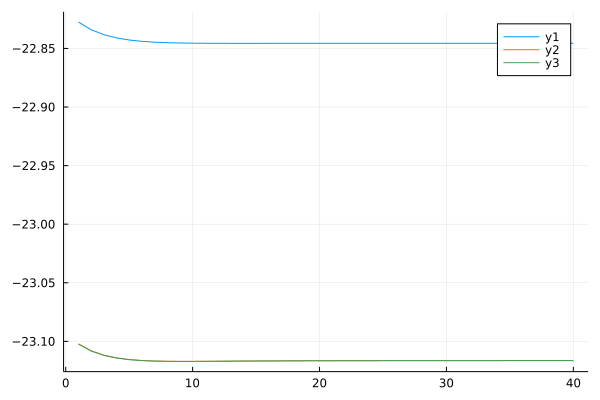

In [85]:
n_steps = 40
step_size = .05

pymol_init = pyscf.gto.Mole(atom=molecule,
    symmetry = false, spin =0,charge=0,
    basis = basis)
pymol.build()


io = open("traj.xyz", "w");
energies_scf = []
energies_ccsd = []
energies_ccsdt = []

for R in 1:n_steps

    pymol = deepcopy(pymol_init)
    scale = 1+R*step_size

    xyz = @sprintf("%5i\n\n", length(mol.atoms))
    tmp = []
    for a in mol.atoms
        push!(tmp, ["He", (a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)])
        xyz = xyz * @sprintf("%6s %24.16f %24.16f %24.16f \n", a.symbol, a.xyz[1]*scale, a.xyz[2]*scale, a.xyz[3]*scale)
    end
    pymol.atom = tmp
    pymol.build()
    
    
    println(xyz)
    write(io, xyz);
   
    
#     println(pymol.format_atom(1))
    
    #     mol_R = Molecule(0, 1, [a[0]pymol.atom, pymol.basis)


    mf = pyscf.scf.RHF(pymol)
    mf.verbose = 4
    mf.conv_tol = 1e-8
    mf.conv_tol_grad = 1e-8
    mf.run(max_cycle=200)

    rdm_mf = mf.make_rdm1()

    @printf(" Hartree-Fock Energy: %12.8f", mf.e_tot)

    push!(energies_scf, mf.e_tot)
    
    pyscfcc = pyimport("pyscf.cc")

    mycc = pyscfcc.CCSD(mf).run()
    @printf("CCSD total energy    %12.8f\n", mycc.e_tot)
    
    et = mycc.ccsd_t()
    @printf("CCSD(T) total energy %12.8f\n", mycc.e_tot + et)

    
    push!(energies_ccsd, mycc.e_tot)
    push!(energies_ccsdt, mycc.e_tot+et)

end
close(io);
plot([energies_scf, energies_ccsd, energies_ccsdt])


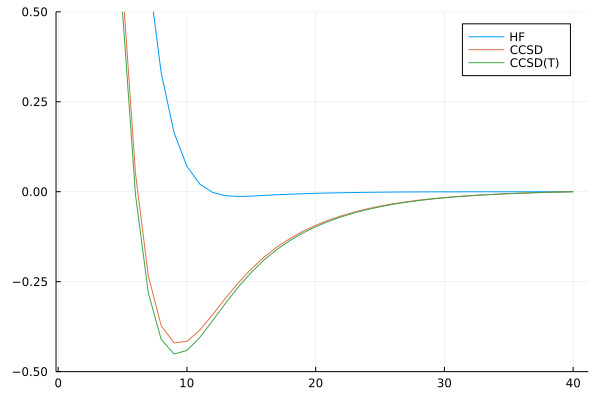

In [94]:
plot([energies_scf.-energies_scf[end], energies_ccsd.-energies_ccsd[end], energies_ccsdt.-energies_ccsdt[end]]*627.51, 
labels = ["HF" "CCSD" "CCSD(T)"])
ylims!((-.5,.5))